# 07 In-Class Assignment: Transformations

<img src="https://people.gnome.org/~mathieu/libart/art-affines.png">

Image from: https://people.gnome.org/~mathieu/libart/libart-affine-transformation-matrices.html
    

### Agenda for today's class (80 minutes)

1. [(20 minutes) Review of HW and Pre-Class Assignment](#Review_of_Pre-Class_Assignment)
1. [(20 minutes) Calculating Inverse Matrices](#Inverse-Matrices)
1. [(20 minutes) Affine Transforms](#Affine_Transforms)
1. [(20 minutes) Fractals](#Fractals)

###MSU###

----
<a name="Homework_1_Review"></a>
## 0. Homework 1 Review


###MSU###

----
<a name="Review_of_Pre-Class_Assignment"></a>
## 1. Review of Pre-Class Assignment

* View multiplication by $A$ as a function from $\mathbb R^n$ to $\mathbb R^n$ and $A^{-1}$ (if it exists) as it inverse function.
* When might $A^{-1}$ not exist for a given square matrix?
    * row picture and a row that is a linear combination of the rest (what does this mean about the corresponding linear equations, depending on the right hand side?)
    * column picture and a column that is a linear combination of the rest (what does this mean about being able to represent a given vector $b$ as a linear combination of the columns?)
* Calculating $A^{-1}$ by Gauss-Jordan Elimination using Augmented Matrix $[A | I] = [A |e_1 e_2 e_3]$ (if working in $\mathbb R^3$)
    * Provide an example  how we transform this to $[I | A^{-1}]$ and explain how then $A^{-1}$ is the product of elementary matrices.

----
<a name="Inverse-Matrices"></a>
## 2. Calculating an Inverse Matrix
 

&#9989; **<font color=red>DO THIS:</font>** Consider the matrix $A$ given by
$$
A=\left[
\begin{array}{rrr}
2 & -1 & 0\\
-1 & 2 & -1\\
0 & -1 & 2
\end{array}
\right].
$$

Use the Gauss-Jordan Elimination to find $A^{-1}$ by row reducing $\begin{bmatrix}A | I\end{bmatrix}$ to $\begin{bmatrix}I | A^{-1}\end{bmatrix}$. The first step is

$$
\left[
\begin{array}{rrr|rrr}
2 & -1 & 0& 1 & 0 &0 \\
-1 & 2 & -1 & 0 & 1 &0 \\
0 & -1 & 2 & 0 & 0 &1 
\end{array}
\right]
$$
$\frac{1}{2}$ (row 1) + (row 2) - what is the corresponding elementary matrix $E_1$?
$$
\left[
\begin{array}{rrr|rrr}
2 & -1 & 0& 1 & 0 &0 \\
0 & \frac{3}{2} & 0 & \frac{1}{2} & 1 &0 \\
0 & -1 & 2 & 0 & 0 &1 
\end{array}
\right]
$$
Complete the rest of the steps to find $A^{-1}$ by hand (on paper) and compare your result with  Python's $A^{-1}$.

Put your result for $A^{-1}$ when working by hand:
$$
A^{-1}=\left[
\begin{array}{rrr}
a & b & c\\
d & e & f\\
g & h & i
\end{array}
\right].
$$


In [2]:
import numpy as np

In [3]:
## Use Python code to find A^{-1}

a = np.matrix([[2]])

----
<a name="Affine_Transforms"></a>
## 3. Affine Transforms

In this section, we are going to explore different types of transformation matrices. 
The following code is designed to demonstrate the properties of some different transformation matrices.  

&#9989; **<font color=red>DO THIS:</font>** Review the following code.  

In [4]:
#Some python packages we will be using
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D # Lets make 3D plots
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

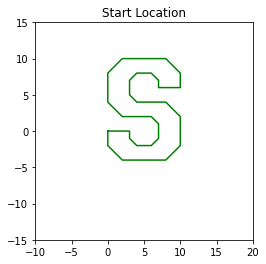

In [5]:
# Define some points
x = [0.0,  0.0,  2.0,  8.0, 10.0, 10.0, 8.0, 4.0, 3.0, 3.0, 4.0, 6.0, 7.0, 7.0, 10.0, 
     10.0,  8.0,  2.0, 0.0, 0.0, 2.0, 6.0, 7.0,  7.0,  6.0,  4.0,  3.0, 3.0, 0.0]
y = [0.0, -2.0, -4.0, -4.0, -2.0,  2.0, 4.0, 4.0, 5.0, 7.0, 8.0, 8.0, 7.0, 6.0,  6.0,
     8.0, 10.0, 10.0, 8.0, 4.0, 2.0, 2.0, 1.0, -1.0, -2.0, -2.0, -1.0, 0.0, 0.0]
con = [ 1.0 for i in range(len(x))] 

p = np.matrix([x,y,con])


mp = p.copy()

#Plot Points
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green');
plt.axis('scaled');
plt.axis([-10,20,-15,15]);
plt.title('Start Location');

### Example Scaling Matrix

⎡0.5  0.0  0.0⎤
⎢             ⎥
⎢0.0  0.5  0.0⎥
⎢             ⎥
⎣0.0  0.0  1.0⎦

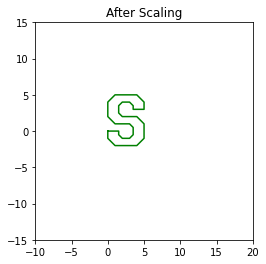

In [6]:
#Example Scaling Matrix

#Define Matrix
scale = 0.5  #The amount that coordinates are scaled.
S = np.matrix([[scale,0,0], [0,scale,0], [0,0,1]])

#Apply matrix

mp = p.copy()
mp = S*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Scaling')
#plt.plot([p[0,14],mp[0,14]],[p[1,14],mp[1,14]], color='blue');

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(S)

### Example Translation Matrix

⎡1  0  10⎤
⎢        ⎥
⎢0  1  -5⎥
⎢        ⎥
⎣0  0  1 ⎦

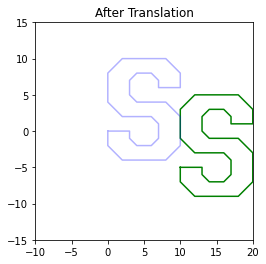

In [7]:
#Example Translation Matrix

#Define Matrix
dx = 10  #The amount shifted in the x-direction
dy = -5 #The amount shifted in the y-direction
T = np.matrix([[1,0,dx], [0,1,dy], [0,0,1]])

#Apply matrix

mp = p.copy()

mp = T*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Translation')

#Uncomment the next line if you want to see the original.
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(T)

### Example Reflection Matrix

⎡1  0   0⎤
⎢        ⎥
⎢0  -1  0⎥
⎢        ⎥
⎣0  0   1⎦

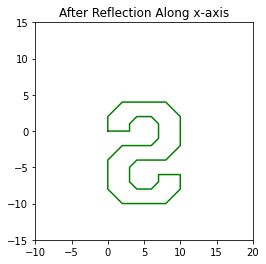

In [8]:
#Example Reflection Matrix

#Define Matrix
Re = np.matrix([[1,0,0],[0,-1,0],[0,0,1]]) ## Makes all y-values opposite so it reflects over the x-axis.

#Apply matrix

mp = p.copy()

mp = Re*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Reflection Along x-axis')


#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(Re)

### Example Rotation Matrix

⎡0.866025403784439        -0.5         0.0⎤
⎢                                         ⎥
⎢       0.5         0.866025403784439  0.0⎥
⎢                                         ⎥
⎣       0.0                0.0         1.0⎦

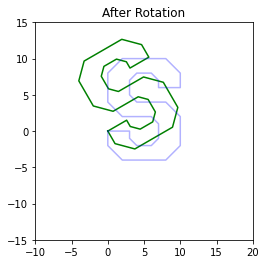

In [12]:
#Example Rotation Matrix

#Define Matrix
degrees = 30
theta = degrees * np.pi / 180  ##Make sure to always convert from degrees to radians. 

# Rotates the points 30 degrees counterclockwise.
R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]]) 

#Apply matrix
mp = p.copy()

mp = R*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Rotation')

#Uncomment the next line if you want to see the original.
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(R)

### Example Shear Matrix

⎡1.0  0.5  0.0⎤
⎢             ⎥
⎢0.0  1.0  0.0⎥
⎢             ⎥
⎣0.0  0.0  1.0⎦

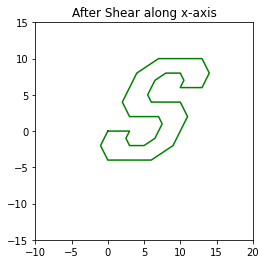

In [10]:
#Example Shear Matrix

#Define Matrix
shx=0.5 # shear in the x-direction
SHx =   np.matrix([[1,shx,0], [0,1,0], [0,0,1]])

#Apply matrix
mp = p.copy()

mp = SHx*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Shear along x-axis')

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(SHx)

⎡1.0  0.0  0.0⎤
⎢             ⎥
⎢0.3  1.0  0.0⎥
⎢             ⎥
⎣0.0  0.0  1.0⎦

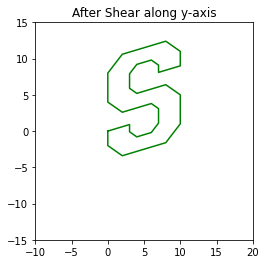

In [11]:
#Example Shear Matrix

#Define Matrix
shy=0.3 #shear in the y-direction
SHy =   np.matrix([[1,0,0], [shy,1,0], [0,0,1]])

#Apply matrix
mp = p.copy()

mp = SHy*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Shear along y-axis')

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(SHy)

&#9989; **<font color=red>DO THIS:</font>** Experiment with different values of ``shx`` and ``shy`` to see their effect.

### Combine Transforms

We have six transforms `R`, `S`, `T`, `Re`, `SHx`, and `SHy`.

&#9989; **<font color=red>DO THIS:</font>** Construct a ($3 \times 3$) transformation Matrix (called `M`) which combines these six transforms into a single matrix. You can choose different orders for these six matrices, then compare your result with other students. 

In [15]:
#Put your code here

M = R*S*T*Re*SHx*SHy

M

matrix([[ 0.57296461,  0.46650635,  5.58012702],
        [ 0.15759619, -0.3080127 ,  0.33493649],
        [ 0.        ,  0.        ,  1.        ]])

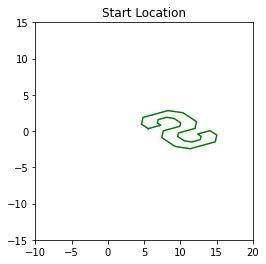

In [16]:
#Plot combined transformed points
mp = p.copy()
mp = M*mp
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green');
plt.axis('scaled');
plt.axis([-10,20,-15,15]);
plt.title('Start Location');

&#9989; **<font color=red>Questions:</font>** Did you can get the same result with others? You can compare the matrix `M` to see the difference. If not, can you explain why it happens?

Put your answer here

### Interactive Example

In [ ]:
from ipywidgets import interact,interact_manual

def affine_image(angle=0.0,scale=1.0,dx=0,dy=0, shx=0, shy=0):
    theta = -angle/180  * np.pi
    
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='green')
    
    S = np.matrix([[scale,0,0], [0,scale,0], [0,0,1]])
    SH1 = np.matrix([[1,shx,0], [0,1,0], [0,0,1]])
    SH2 = np.matrix([[1,0,0], [shy,1,0], [0,0,1]])
    T = np.matrix([[1,0,dx], [0,1,dy], [0,0,1]])
    R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
    
    #Full Transform
    FT = T*SH2*SH1*R*S;
    #Apply Transforms
    p2 =  FT*p;
    
    #Plot Output
    plt.plot(p2[0,:].tolist()[0],p2[1,:].tolist()[0], color='black')
    plt.axis('equal')
    plt.axis([-20,30,-15,15])
    return sym.Matrix(FT)

In [ ]:
interact(affine_image, angle=(-180,180), scale_manual=(0.01,2), dx=(-5,15,0.5), dy=(-15,15,0.5), shx = (-1,1,0.1), shy = (-1,1,0.1)); ##TODO: Modify this line of code

The following command can also be used but it may be slow on some peoples computers.

In [ ]:
interact(affine_image, angle=(-180,180), scale=(0.01,2), dx=(-5,15,0.5), dy=(-15,15,0.5), shx = (-1,1,0.1), shy = (-1,1,0.1)); ##TODO: Modify this line of code

&#9989; **<font color=red>DO THIS:</font>**  Using the above interactive enviornment to see if you can figure out the transformation matrix to make the following image:

<img src="https://lh6.googleusercontent.com/_0-jr5Z0DQzqVM3TD3Xa3QWC43PBT6ru5M-B-_7dfbib2SSvkNkxtioBFaU__jTvEJMMG9SAVg=w380">

&#9989; **<font color=red>Questions:</font>** What where the input values?


Put your answer here:

r = 0

scale = 0.81

dx = 8.5

dy = -12

shx = -1

shy = 0

----
<a name="Fractals"></a>
## 3. Fractals


In this section we are going to explore using transformations to generate fractals.  Consider the following set of linear equations.  Each one takes a 2D point as input, applies a $2 \times 2$ transform, and then also translates by a $2 \times 1$ translation matrix

$$ 
T_1:\left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.86 & 0.03  \\
    -0.03 & 0.86 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
1.5
\end{matrix}
\right]
: probability =  0.83 $$ 

$$ 
T_2: \left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.2 & -0.25  \\
    0.21 & 0.23 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
1.5
\end{matrix}
\right]
: probability =  0.08 $$ 

$$ 
T_3 : \left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.15 & 0.27  \\
    0.25 & 0.26 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
0.45
\end{matrix}
\right]
: probability =  0.08 $$ 

$$ 
T_4: \left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0 & 0  \\
    0 & 0.17 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
0
\end{matrix}
\right] : probability =  0.01 $$

We want to write a program that uses the above transformations to "randomly" generate an image.  We start with a point at the origin (0,0) and then randomly pick one of the above transformation based on their probabilities, update the point position and then randomly pick another point.  Each matrix adds a bit of rotation and translation with $T_4$ as a kind of restart.    


To try to make our program a little easier, let's rewrite the above equations to make a system of "equivalent" equations of the form $Ax=b$ with only one matrix.   We do this by adding an additional variable variable $z=1$.  For example, verify that the following equation is the same as equation for $T_1$ above:

$$ 
T_1: \left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.86 & 0.03 & 0 \\
    -0.03 & 0.86 & 1.5
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 \\
    1
 \end{matrix}
\right] 
$$ 
Please NOTE that we do not change the value for $z$, and it is always be $1$.

&#9989; **<font color=red>DO THIS:</font>** Verify that the $Ax=b$ format will generate the same answer as the $T_1$ equation above.

The following is some pseudocode that we will be using to generate the Fractals:

1. Let $x = 0$, $y = 0$, $z=1$
2. Use a random generator to select one of the affine transformations $T_i$ according to the given probabilities.
3. Let $(x',y') = T_i(x,y,z)$.
4. Plot $(x', y')$
5. Let $(x,y) = (x',y')$
6. Repeat Steps 2, 3, 4, and 5 one thousand times. 

The following python code implements the above pseudocode with only the $T_1$ matrix:

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

T1 = np.matrix([[0.86, 0.03, 0],[-0.03, 0.86, 1.5]])
#####Start your code here #####
T2 = T1 
T3 = T1
T4 = T1
#####End of your code here#####       

prob = [0.83,0.08,0.08,0.01]

I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])

fig = plt.figure(figsize=[10,10])
p = np.matrix([[0.],[0],[1]])
plt.plot(p[0],p[1], 'go');
for i in range(1,1000):
    ticket = np.random.random();
    if (ticket < prob[0]):
        T = T1
    elif (ticket < sum(prob[0:2])):
        T = T2
    elif (ticket < sum(prob[0:3])):
        T = T3
    else:
        T = T4
    p[0:2,0] = T*p    
    plt.plot(p[0],p[1], 'go');
plt.axis('scaled');

&#9989; **<font color=red>DO THIS:</font>** Modify the above code to add in the $T_2$, $T_3$ and $T_4$ transforms.  

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

T1 = np.matrix([[0.86, 0.03, 0],[-0.03, 0.86, 1.5]])
#####Start your code here #####
T2 = np.matrix([[0.2, -.25, 0],[.21, 0.23, 1.5]])
T3 = np.matrix([[0.15, .27, 0],[.25, 0.26, .45]])
T4 = np.matrix([[0, 0, 0],[0, 0.17, 0]])

T2 = T2 
T3 = T3
T4 = T4
#####End of your code here#####       

prob = [0.83,0.08,0.08,0.01]

I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])

fig = plt.figure(figsize=[10,10])
p = np.matrix([[0.],[0],[1]])
plt.plot(p[0],p[1], 'go');
for i in range(1,1000):
    ticket = np.random.random();
    if (ticket < prob[0]):
        T = T1
    elif (ticket < sum(prob[0:2])):
        T = T2
    elif (ticket < sum(prob[0:3])):
        T = T3
    else:
        T = T4
    p[0:2,0] = T*p    
    plt.plot(p[0],p[1], 'go');
plt.axis('scaled');

&#9989; **<font color=red>QUESTION:</font>**  Describe in words for the actions performed by $T_1$, $T_2$, $T_3$, and $T_4$. 

$T_1$: Put your answer here

$T_2$: Put your answer here

$T_3$: Put your answer here


$T_4$: Put your answer here

&#9989; **<font color=red>DO THIS:</font>** Using the same ideas to design and build your own fractal.  You are welcome to get inspiration from the internet. Make sure you document where your inspiration comes from.  Try to build something fun, unique and different.  Show what you come up with with your instructors. 

In [ ]:
#Put your code here. 

----
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

###STARTFOOTER###

-----
### Congratulations, we're done!
